In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [33]:
# Importing the file, creating the path
path = r'C:\Users\Anna\Desktop\Data Analytics\Instacart Basket Analysis'

In [34]:
# Checking the file info
df_ords_prods_cust_final = pd.read_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'df_ords_prods_custmrs.pkl'))
df_ords_prods_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252953 entries, 0 to 252952
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   order_id                     100000 non-null  float64 
 1   user_id                      252953 non-null  int64   
 2   eval_set                     100000 non-null  object  
 3   order_number                 100000 non-null  float64 
 4   order_dow                    100000 non-null  float64 
 5   order_hour_of_day            100000 non-null  float64 
 6   days_since_prior_order       93365 non-null   float64 
 7   product_id                   100000 non-null  float64 
 8   add_to_cart_order            100000 non-null  float64 
 9   reordered                    100000 non-null  float64 
 10  product_name                 100000 non-null  object  
 11  aisle_id                     100000 non-null  float64 
 12  department_id                100000 non-null

Q.2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The data sets used in the tasks were created specifically for the study purposes.
The prices and clients listed are not real. Therefore, there is no leagal vaolation and the dataset is exempt from PII rules.

Q.3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [4]:
# Region list
Region = []

for value in df_ords_prods_cust_final ['state']:
 if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    Region.append('North East')
 elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    Region.append('Midwest')
 elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    Region.append('South')
 else:
    Region.append('West')

In [5]:
# Creating the region column 
df_ords_prods_cust_final['region'] = Region
df_ords_prods_cust_final.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,registration_date,number_dependants,marital_status,income,region
0,2862468.0,66479,prior,24.0,4.0,13.0,10.0,24838.0,3.0,1.0,...,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West
1,2928198.0,66479,prior,31.0,0.0,16.0,7.0,24838.0,4.0,1.0,...,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West
2,1897405.0,66479,prior,11.0,3.0,16.0,2.0,24838.0,3.0,1.0,...,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West


In [6]:
#Checking the data type 
df_ords_prods_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252953 entries, 0 to 252952
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   order_id                     100000 non-null  float64 
 1   user_id                      252953 non-null  int64   
 2   eval_set                     100000 non-null  object  
 3   order_number                 100000 non-null  float64 
 4   order_dow                    100000 non-null  float64 
 5   order_hour_of_day            100000 non-null  float64 
 6   days_since_prior_order       93365 non-null   float64 
 7   product_id                   100000 non-null  float64 
 8   add_to_cart_order            100000 non-null  float64 
 9   reordered                    100000 non-null  float64 
 10  product_name                 100000 non-null  object  
 11  aisle_id                     100000 non-null  float64 
 12  department_id                100000 non-null

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
Spending_Habits = pd.crosstab(df_ords_prods_cust_final['spending_flag'], df_ords_prods_cust_final['region'], dropna = False)
Spending_Habits

region,Midwest,North East,South,West
spending_flag,,,,
High spender,12877,9831,18425,14086
Low spender,10336,7777,15084,11584


The crosstab reveals that the South High Spenders are the ones making the largest contributions to the overall revenue.
The West, Midwest, and the North East follow them. 

Q.4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [8]:
# Creating activity flag using the max_order column to set our criteria
df_ords_prods_cust_final.loc[df_ords_prods_cust_final['max_order']<5, 'activity_flag'] = 'low_activity_customer'
df_ords_prods_cust_final.loc[df_ords_prods_cust_final['max_order']>=5, 'activity_flag'] = 'high_activity_customer'
df_ords_prods_cust_final.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2862468.0,66479,prior,24.0,4.0,13.0,10.0,24838.0,3.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer
1,2928198.0,66479,prior,31.0,0.0,16.0,7.0,24838.0,4.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer
2,1897405.0,66479,prior,11.0,3.0,16.0,2.0,24838.0,3.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer


In [9]:
# Creating a subset for the "low activity Customers"
low_activity_custs = df_ords_prods_cust_final[df_ords_prods_cust_final['activity_flag'] == 'low_activity_customer']
low_activity_custs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
26,744208.0,97447,prior,4.0,0.0,17.0,21.0,24838.0,1.0,1.0,...,Schroeder,Male,Mississippi,56,8/14/2018,0,single,158378,South,low_activity_customer
75,1783717.0,119599,prior,1.0,5.0,19.0,NaN,24838.0,8.0,0.0,...,Glover,Female,Arkansas,77,7/4/2017,2,married,92042,South,low_activity_customer
76,1112778.0,62366,prior,3.0,2.0,9.0,14.0,24838.0,3.0,1.0,...,Manning,Female,Texas,34,5/5/2019,2,married,72360,South,low_activity_customer
77,1359611.0,62366,prior,1.0,2.0,8.0,NaN,24838.0,6.0,0.0,...,Manning,Female,Texas,34,5/5/2019,2,married,72360,South,low_activity_customer
139,672550.0,164805,prior,3.0,2.0,7.0,28.0,24838.0,1.0,0.0,...,Barker,Female,New Hampshire,76,6/27/2018,2,married,93351,North East,low_activity_customer


In [10]:
# Checking the subset size
low_activity_custs.shape

(15763, 37)

In [11]:
# Exporting the subset
low_activity_custs.to_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'low_act_customers.pkl'))

In [12]:
# Creating a subset for the high activity customers
high_activity_custs = df_ords_prods_cust_final[df_ords_prods_cust_final['activity_flag'] == 'high_activity_customer']

In [13]:
high_activity_custs.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2862468.0,66479,prior,24.0,4.0,13.0,10.0,24838.0,3.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer
1,2928198.0,66479,prior,31.0,0.0,16.0,7.0,24838.0,4.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer
2,1897405.0,66479,prior,11.0,3.0,16.0,2.0,24838.0,3.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer
3,2185483.0,66479,prior,51.0,1.0,13.0,3.0,24838.0,4.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer
4,1330685.0,66479,prior,22.0,5.0,16.0,5.0,24964.0,1.0,1.0,...,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187,West,high_activity_customer


In [14]:
# Checking the subset's columns
high_activity_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84237 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   order_id                     84237 non-null  float64 
 1   user_id                      84237 non-null  int64   
 2   eval_set                     84237 non-null  object  
 3   order_number                 84237 non-null  float64 
 4   order_dow                    84237 non-null  float64 
 5   order_hour_of_day            84237 non-null  float64 
 6   days_since_prior_order       81817 non-null  float64 
 7   product_id                   84237 non-null  float64 
 8   add_to_cart_order            84237 non-null  float64 
 9   reordered                    84237 non-null  float64 
 10  product_name                 84237 non-null  object  
 11  aisle_id                     84237 non-null  float64 
 12  department_id                84237 non-null  float64 
 13  p

Q5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Customer Profile

                                           AGE

In [15]:
# Checking Age Column Statistical description

high_activity_custs['age'].describe()

count    84237.000000
mean        49.312784
std         18.449486
min         18.000000
25%         33.000000
50%         49.000000
75%         65.000000
max         81.000000
Name: age, dtype: float64

According to statistical data, the youngest (min) age is 18 and the oldest (max) age is 81. Hence, the category could be devided aprox. by 10 years range
18 - 29 y.o -Student 
30 - 39 y.o.- Young Adult
40 - 49 y.o. - Middle Age
50 - 59 y.o. - Senior Middle Age
> 60 y.o. - Senior

In [17]:
high_activity_custs.loc[(high_activity_custs['age'] >= 18) & (high_activity_custs['age'] < 29), 'Age_Category'] = 'Student'
high_activity_custs.loc[(high_activity_custs['age'] >= 30) & (high_activity_custs['age'] < 39), 'Age_Category'] = 'Young Adult'
high_activity_custs.loc[(high_activity_custs['age'] >= 40) & (high_activity_custs['age'] < 49), 'Age_Category'] = 'Middle Age'
high_activity_custs.loc[(high_activity_custs['age'] >= 50) & (high_activity_custs['age'] < 59), 'Age_Category'] = 'Senior Middle Age'
high_activity_custs.loc[high_activity_custs['age'] >= 60, 'Age_Category'] = 'Senior'

high_activity_custs['Age_Category'].value_counts()

Senior               28685
Student              14503
Young Adult          12127
Middle Age           11877
Senior Middle Age    11561
Name: Age_Category, dtype: int64

                                                INCOME

In [18]:
# Checking Income Column description

high_activity_custs['income'].describe()

count     84237.000000
mean     100637.335209
std       40640.784062
min       25955.000000
25%       69592.000000
50%       97529.000000
75%      128467.000000
max      593901.000000
Name: income, dtype: float64

Statistic above shows that the lowest income category has a minimum of 259,000 USD per annum and a maximum of 593,000 USD per annum, with 75% of consumers having an income of 128,000 USD per annum.

 LOW INCOME                        0 - 100,000 USD
 MIDDLE INCOME              100,0001 - 200,000 USD
 UPPER MIDDLE INCOME        200,0001 - 400,000 USD
 HIGH INCOME                400,0001 USD - above

In [20]:
# Creating column for income categore 

high_activity_custs.loc[high_activity_custs['income'] <= 100000, 'Income_Category'] = 'Low Income'
high_activity_custs.loc[(high_activity_custs['income'] >= 100001) & (high_activity_custs['income'] <= 200000), 'Income_Category'] = 'Middle Income'
high_activity_custs.loc[(high_activity_custs['income'] >= 200001) & (high_activity_custs['income'] <= 400000), 'Income_Category'] = 'Upper Middle Income'
high_activity_custs.loc[high_activity_custs['income'] >= 400001, 'Income_Category'] = 'High Income'

high_activity_custs['Income_Category'].value_counts(dropna = False)

Low Income             44867
Middle Income          38874
Upper Middle Income      409
High Income               87
Name: Income_Category, dtype: int64

                                     HOUSEHOLD

In [22]:
# Creating the household flag
high_activity_custs.loc[high_activity_custs['number_dependants'] <= 0 ,'household_flag']='Small household'
high_activity_custs.loc[(high_activity_custs ['number_dependants'] >= 1) & (high_activity_custs['number_dependants'] <= 2),'household_flag']='Medium household'
high_activity_custs.loc[high_activity_custs['number_dependants']>=3,'household_flag']='Big household'
high_activity_custs['household_flag'].value_counts(dropna=False)

Medium household    41955
Big household       21215
Small household     21067
Name: household_flag, dtype: int64

Q.6 Create an appropriate visualization to show the distribution of profiles.

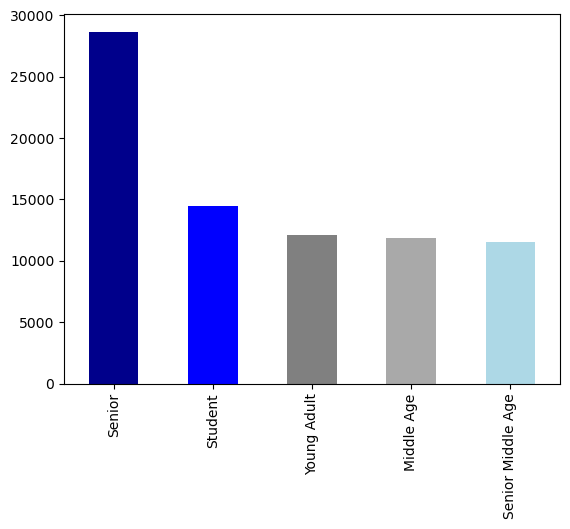

In [36]:
# Create a Bar Chart for Age Profile
bchart_age_ctgry = high_activity_custs['Age_Category'].value_counts().plot.bar(color = ['darkblue','blue','grey','darkgrey','lightblue'])


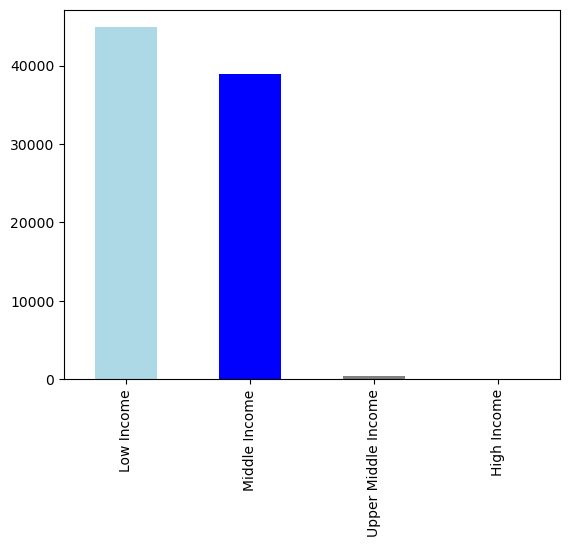

In [38]:
# Create a Bar Chart for Income Profile

bchart_incm_ctgry = high_activity_custs['Income_Category'].value_counts().plot.bar(color = ['lightblue', 'blue', 'grey','darkblue'])

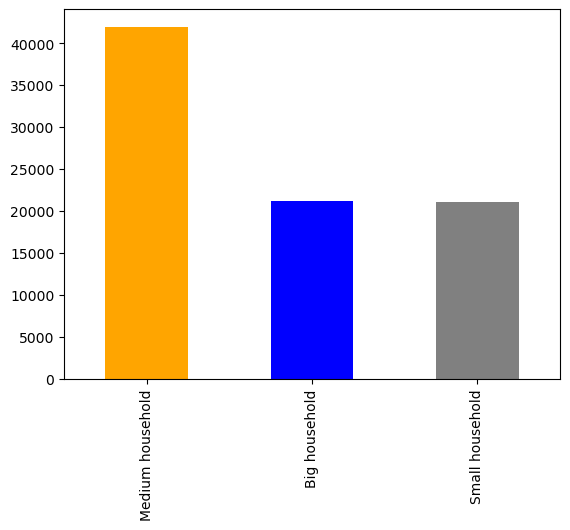

In [40]:
# Create a Bar Chart for Household Status Profile
bchart_hshld_stts = high_activity_custs['household_flag'].value_counts().plot.bar(color = ['orange', 'blue', 'grey'])

Q.7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [41]:
# Age Profile Usage Frequency Aggregation
high_activity_custs.groupby('Age_Category').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                    mean  min   max
Age_Category                                       
Middle Age                     10.294286  0.0  30.0
Senior                         10.216524  0.0  30.0
Senior Middle Age              10.437522  0.0  30.0
Student                        10.332814  0.0  30.0
Young Adult                    10.181177  0.0  30.0

In [42]:
# Age Profile Expenditure Aggregation
high_activity_custs.groupby('Age_Category').agg({'prices':['mean', 'min','max']})

prices           
                       mean  min   max
Age_Category                          
Middle Age         8.319609  1.3  22.3
Senior             8.253056  1.3  22.3
Senior Middle Age  8.341329  1.3  22.3
Student            8.298262  1.3  22.3
Young Adult        8.340397  1.3  22.3

In [43]:
# Income Profile Usage Frequency Aggregation
high_activity_custs.groupby('Income_Category').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                      mean  min   max
Income_Category                                      
High Income                      12.282353  0.0  30.0
Low Income                       10.282996  0.0  30.0
Middle Income                    10.250298  0.0  30.0
Upper Middle Income              10.240695  0.0  30.0

In [44]:
# Expenditure per income per Aggregaton
high_activity_custs.groupby('Income_Category').agg({'prices':['mean', 'min','max']})

prices           
                          mean  min   max
Income_Category                          
High Income          10.675862  1.3  14.7
Low Income            8.256099  1.3  22.3
Middle Income         8.351502  1.3  22.3
Upper Middle Income   8.722249  1.3  16.4

In [45]:
# Frequency per household size Aggregation
high_activity_custs.groupby('Income_Category').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                      mean  min   max
Income_Category                                      
High Income                      12.282353  0.0  30.0
Low Income                       10.282996  0.0  30.0
Middle Income                    10.250298  0.0  30.0
Upper Middle Income              10.240695  0.0  30.0

In [46]:
# Еxpenditure per household size Aggregation
high_activity_custs.groupby('Income_Category').agg({'prices':['mean', 'min','max']})

prices           
                          mean  min   max
Income_Category                          
High Income          10.675862  1.3  14.7
Low Income            8.256099  1.3  22.3
Middle Income         8.351502  1.3  22.3
Upper Middle Income   8.722249  1.3  16.4

Q.8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [47]:
# Comporison Age Category and Region

Age_region = pd.crosstab(high_activity_custs['region'], high_activity_custs['Age_Category'])
Age_region

Age_Category,Middle Age,Senior,Senior Middle Age,Student,Young Adult
region,,,,,
Midwest,2839,6665,2748,3240,2787
North East,2113,5072,1995,2541,2003
South,3980,9490,3867,5038,4170
West,2945,7458,2951,3684,3167


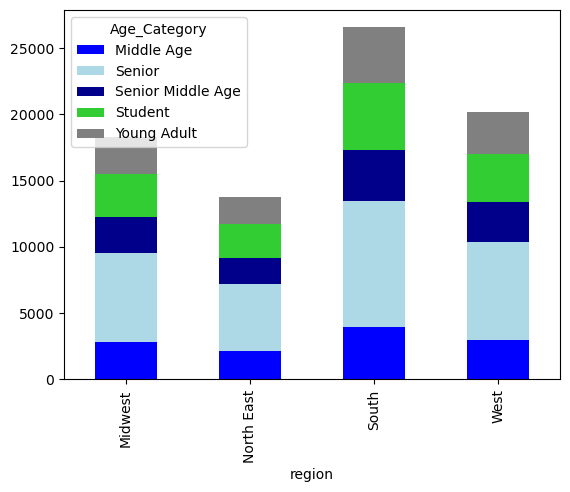

In [48]:
Age_region = Age_region.plot(kind = 'bar', stacked = True, color = ['blue', 'lightblue', 'Darkblue', 'limegreen', 'grey'])

In [ ]:
The graph above demonstarates the age groups distribution among regions in USA. It can be detected, that more young people live in the South, the same as Seniors. 

In [49]:
# Comporison Products and Region

reg_prod =pd.crosstab(high_activity_custs['product_name'], high_activity_custs['region'])
reg_prod

region,Midwest,North East,South,West
product_name,,,,
93% Ground Beef,150,128,236,159
Active Dry Yeast,84,75,106,107
Almond Breeze Original Almond Milk,220,156,322,231
Almond Milk Blueberry Yogurt,64,72,147,122
Apple Pie Fruit & Nut Food Bar,131,121,228,172
...,...,...,...,...
Veggie Chips,197,129,224,199
White Sliced Mushrooms,134,96,178,184
Whole Milk Plain Yogurt,297,234,468,335


In [56]:
# Comporison Products and Age Category

reg_age =pd.crosstab(high_activity_custs['product_name'], high_activity_custs['Age_Category'])
reg_age

Age_Category,Middle Age,Senior,Senior Middle Age,Student,Young Adult
product_name,,,,,
93% Ground Beef,83,203,79,162,103
Active Dry Yeast,47,124,43,74,59
Almond Breeze Original Almond Milk,131,358,116,152,103
Almond Milk Blueberry Yogurt,70,131,55,64,61
Apple Pie Fruit & Nut Food Bar,96,212,105,113,78
...,...,...,...,...,...
Veggie Chips,96,262,107,122,119
White Sliced Mushrooms,103,212,65,104,76
Whole Milk Plain Yogurt,164,429,205,282,173


In [53]:
# Comporison Income and Region

reg_inc =pd.crosstab(high_activity_custs['Income_Category'], high_activity_custs['region'])
reg_inc

region,Midwest,North East,South,West
Income_Category,,,,
High Income,22,11,26,28
Low Income,10108,7820,15256,11683
Middle Income,9291,6862,12913,9808
Upper Middle Income,91,68,117,133


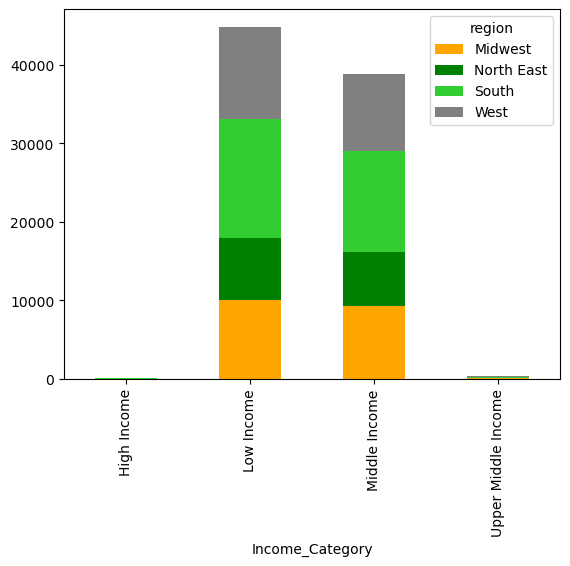

In [54]:
reg_inc_val = reg_inc.plot(kind = 'bar', stacked = True, color = ['orange', 'green', 'limegreen', 'grey'])

Shop managers in various locations will have a better understanding of the client profiles and preferred items by each segment by being aware of all the aforementioned factors. For instance, it was discovered that there are many Seniors in the South Region. Since we are aware of their preferred items e.g Meat and their financial situation, the store owners might provide more or less of these things in a respectable price range.
Furthermore, there are many people on Middle west and West regions with High Income and Upper Middle income with also high level of young and relatively young population, hence, special shops which will provide First products could be established. The same could be adressed to Low-income Segment.

Visualizations:

In [59]:
reg_inc_val.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'reg_inc_val.png'))

In [60]:
Age_region.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'Age_region.png'))

In [61]:
bchart_hshld_stts.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bchart_hshld_stts.png'))

In [62]:
bchart_incm_ctgry.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bchart_incm_ctgry.png'))

In [63]:
bchart_age_ctgry.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'bchart_age_ctgry.png'))

File:

In [64]:
high_activity_custs.to_pickle(os.path.join(path, '2 Data','Prepared Data', 'high_activity_custs.pkl'))